# Dimensionamento do trocador de calor segundo método das médias logaritmicas da temperatura

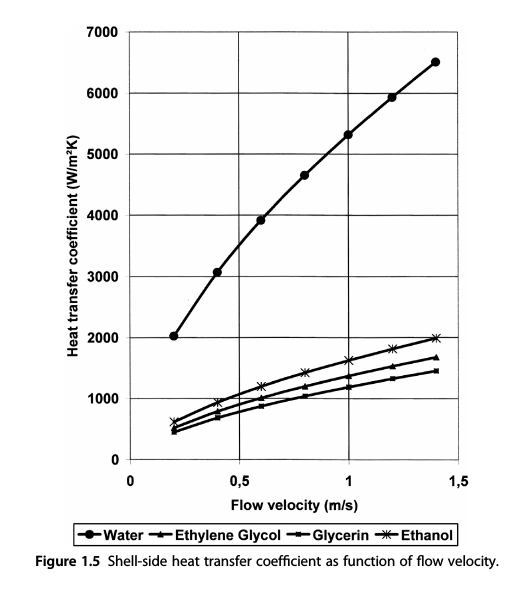

In [1]:
from IPython.display import Image
Image("/home/rburcon/Modelos/trocador_calor/U_casco.png")

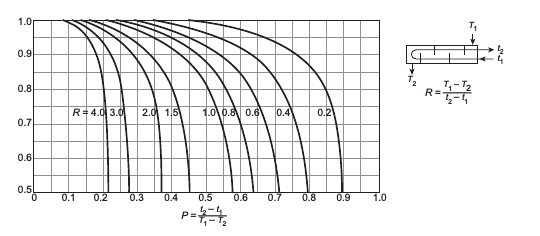

In [2]:
from IPython.display import Image
Image("/home/rburcon/Modelos/trocador_calor/correc.png")

In [3]:
from iapws import IAPWS97
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(rc={"figure.figsize": (12, 6)})

#geometria da tubulaçao
diam_tubo=0.03810 #metros


#propriedades do vapor
steam_in=IAPWS97(P=0.8, x=1)
steam_out=IAPWS97(P=0.65, x=0)
T_media_vap=(steam_in.T+steam_out.T)/2
h0=1100 #w/m2.K            
               
#propriedades da agua
T_ini=25 #C
T_final=75 #C
m=10000 #litros por hora
m_ponto=m/3600 #kg/s   

T_ini=T_ini+273.15 #K
T_final=T_final+273.15 #K
T_media=(T_ini+T_final)/2
agua_sat=IAPWS97(T=T_media, x=0) 
pr_agua=agua_sat.Prandt
mu_agua=agua_sat.mu #Pa·s
k_agua=agua_sat.k #W/m·K 
cp=agua_sat.cp 

#calor trocado

q=(m_ponto*cp*(T_final-T_ini))*1000 #watts               

#estimando o numero de Reynolds do escoamento interno
Re=4*m_ponto/(np.pi*diam_tubo*mu_agua)

#estimando o numero de Nusset
Nu=0.023*Re**(4/5)*pr_agua**0.4
             
#estimando o hi
hi=Nu*k_agua/diam_tubo #w/m2.K            

#coeficiente global de transferencia de calor
U=1/(1/h0+1/hi) #w/m2.k

#temperatura media logaritmica
Th_i=steam_in.T-273.15
Tc_o=T_final-273.15
Th_o=steam_out.T-273.15
Tc_i=T_ini-273.15
delta_T_lm=((Th_i-Tc_o)-(Th_o-Tc_i))/np.log(((Th_i-Tc_o)/(Th_o-Tc_i)))

P=(T_final-T_ini)/(steam_in.T-T_ini)
R=(steam_in.T-steam_out.T)/(T_final-T_ini)
print("\nP=", P)
print("\nR=", R)

#comprimento de tubo
F=1 #fator de correçao
N=14 #numero de tubos
L=q/(U*N*2*np.pi*diam_tubo*F*delta_T_lm) #m

#fluxo de vapor

m_ponto_vap=q/1000/(steam_in.h-steam_out.h)
area_troc=0.1*1.1 #m2
vel_vapor=m_ponto_vap*((steam_in.v+steam_out.v)/2)/area_troc
    
    
print ("\nmassa de vapor kg/s-->>", round(m_ponto_vap,8) )
print ("\nvelocidade de vapor m/s-->>", round(vel_vapor,8) )
print ("\nO Prandt-->>", round(pr_agua,8) )
print ("\nO mu-->>", round(mu_agua,8) )
print ("\nO k W/m·K-->>", round(k_agua,8) )
print ("\nTemperatura entrada vapor °C-->>", round((steam_in.T-273.15),8) )
print ("\nTemperatura saida Vapor °C-->>", round((steam_out.T-273.15),8) )
print ("\nCalor trocado W-->>", round(q,8) )
print ("\nRe-->>", round(Re,8) )
print ("\nNu-->>", round(Nu,8) )
print ("\nhi W/m·K-->>", round(hi,8) )
print ("\nU W/m·K-->>", round(U,8) )
print ("\nDelta T ln °C-->>", round(delta_T_lm,8) )
print ("\nComprimento da tubulaçao-->>", round(L,2),"m" )



P= 0.3438470037635844

R= 0.16854348968242674

massa de vapor kg/s-->> 0.27854992

velocidade de vapor m/s-->> 0.30568561

O Prandt-->> 3.56586535

O mu-->> 0.0005465

O k W/m·K-->> 0.6405896

Temperatura entrada vapor °C-->> 170.41351081

Temperatura saida Vapor °C-->> 161.98633633

Calor trocado W-->> 580522.23438334

Re-->> 169859.23927475

Nu-->> 584.33937475

hi W/m·K-->> 9824.71720791

U W/m·K-->> 989.2419843

Delta T ln °C-->> 114.94970735

Comprimento da tubulaçao-->> 1.52 m
